In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Rent data

we dowloaded the 'Apartment-List-Rent-Data-State_2019-10' (csv) file from https://www.apartmentlist.com/rentonomics/rental-price-data/

In [86]:
#we load the data and quickly visualize it
df = pd.read_csv("Data/Apartment-List-Rent-Data-State_2019-10.csv")
df.head()

,Location,Location_Type,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,Price_2014_07,...,Price_2019_01,Price_2019_02,Price_2019_03,Price_2019_04,Price_2019_05,Price_2019_06,Price_2019_07,Price_2019_08,Price_2019_09,Price_2019_10
0,Alabama,State,Studio,573,573,574,574,575,576,578.0,...,612,610,609,613,618,622,622,621,620,620
1,Alabama,State,1br,624,624,625,625,626,627,629.0,...,666,664,663,667,672,677,677,676,675,675
2,Alabama,State,2br,758,758,759,759,760,762,765.0,...,809,807,805,811,817,823,823,822,820,820
3,Alabama,State,3br,1013,1013,1014,1015,1016,1018,1022.0,...,1081,1078,1076,1083,1091,1099,1100,1098,1095,1096
4,Alabama,State,4br,1178,1178,1179,1180,1182,1184,1188.0,...,1257,1254,1251,1260,1269,1279,1279,1277,1274,1275


In [87]:
#we check for null values
df.isnull().values.any()

True

In [88]:
#we visualize where it is
null_columns=df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)].head()

,Location,Location_Type,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,Price_2014_07,...,Price_2019_01,Price_2019_02,Price_2019_03,Price_2019_04,Price_2019_05,Price_2019_06,Price_2019_07,Price_2019_08,Price_2019_09,Price_2019_10
220,Vermont,State,Studio,793,794,794,796,798,801,NaN,...,862,861,858,861,865,870,869,867,864,860
221,Vermont,State,1br,892,893,893,895,898,900,NaN,...,970,968,965,969,973,978,977,975,971,967
222,Vermont,State,2br,1125,1126,1127,1130,1133,1136,NaN,...,1224,1221,1218,1222,1228,1235,1234,1231,1226,1221
223,Vermont,State,3br,1488,1490,1490,1494,1498,1503,NaN,...,1619,1615,1611,1617,1624,1633,1631,1628,1621,1614
224,Vermont,State,4br,1635,1637,1638,1642,1647,1651,NaN,...,1779,1775,1770,1776,1784,1794,1793,1789,1782,1774


All the missing values are for the Vermont state. Since the rent price doesn't vary a lot, we will simply fill the missing values with the 'Price_2014_06' for the first block of missing values and with 'Price_2015_06' column for the second block of missing values since these columns are only one month before the Nan values.

In [89]:
null_columns

Index(['Price_2014_07', 'Price_2014_08', 'Price_2014_09', 'Price_2014_10',
       'Price_2014_11', 'Price_2014_12', 'Price_2015_01', 'Price_2015_02',
       'Price_2015_03', 'Price_2015_04', 'Price_2015_05', 'Price_2015_06',
       'Price_2015_07', 'Price_2015_10', 'Price_2015_11', 'Price_2015_12',
       'Price_2016_01'],
      dtype='object')

In [90]:
#fill missing values for first block of 'NaN'
for col in null_columns[:13]:
    df[col] = df[col].fillna(df.Price_2014_06)

In [91]:
#fill missing values for second block of 'NaN'
for col in null_columns[13:]:
    df[col] = df[col].fillna(df.Price_2015_09)

In [92]:
#we check for null values
df.isnull().values.any()

False

In [93]:
#we verify that all the locations are States, we only want to compute states prices
if((df.Location_Type.to_numpy()!='State').sum()==0): print("All locations are States so we can drop this column")

All locations are States so we can drop this column


In [94]:
df = df.drop('Location_Type', axis=1)

We can see that there are several rows for each states and several columns for each year. We will start by averaging the price for each year.  
We will also remove the year 2019 since the two last months are not available yet.

## Making one column per year

In [95]:
#drop 2019 columns
df = df.drop(['Price_2019_01', 'Price_2019_02', 'Price_2019_03', 'Price_2019_04', 'Price_2019_05',\
              'Price_2019_06', 'Price_2019_07', 'Price_2019_08', 'Price_2019_09', 'Price_2019_10'], axis=1)
#average each remaning year
for year in np.arange(2014, 2019):
    #add a column for the entire year
    df['Price_'+str(year)] = 0
    for month in np.arange(1, 13):
        #update the year price for each month and remove the month from the dataframe
        df['Price_'+str(year)] = df['Price_'+str(year)]+df['Price_'+str(year)+'_'+str(month).zfill(2)]/12
        df = df.drop('Price_'+str(year)+'_'+str(month).zfill(2), axis=1)
df.head()

,Location,Bedroom_Size,Price_2014,Price_2015,Price_2016,Price_2017,Price_2018
0,Alabama,Studio,576.916667,580.083333,584.083333,598.083333,605.416667
1,Alabama,1br,628.000000,631.500000,635.833333,650.833333,659.000000
2,Alabama,2br,762.833333,767.166667,772.333333,790.916667,800.666667
3,Alabama,3br,1019.500000,1025.250000,1032.166667,1056.833333,1069.666667
4,Alabama,4br,1185.666667,1192.500000,1200.416667,1229.333333,1244.333333


## Making one column per Bedroom_Size type

To have one column per Bedroom_Size type for each year, we will:  
- group by Bedroom_Size
- rename columns of price for each year according to each Bedroom_Size
- remove the Bedroom_Size column
- join each group on 'Location'

In [96]:
#creating the output dataframe (we will join on this dataframe)
output = pd.DataFrame(data=df.Location.unique(),
              index=range((df.Location.unique()).size),
              columns=['Location'])
output.head()

,Location
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [97]:
#we first group by 'Bedroom_Size'
gdf = df.groupby("Bedroom_Size")
for name, group in gdf:
    #for each 'Bedroom_Size' type we rename the columns accordingly
    group = group.rename(columns={"Price_2014": "Price_2014_"+name, "Price_2015": "Price_2015_"+name,\
                                  "Price_2016": "Price_2016_"+name, "Price_2017": "Price_2017_"+name,\
                                 "Price_2018": "Price_2018_"+name})
    #we remove the 'Bedroom_Size' column
    group = group.drop('Bedroom_Size', axis=1)
    #we join this group to the output
    output = pd.merge(output, group, on ='Location')
output.head()

,Location,Price_2014_1br,Price_2015_1br,Price_2016_1br,Price_2017_1br,Price_2018_1br,Price_2014_2br,Price_2015_2br,Price_2016_2br,Price_2017_2br,...,Price_2014_4br,Price_2015_4br,Price_2016_4br,Price_2017_4br,Price_2018_4br,Price_2014_Studio,Price_2015_Studio,Price_2016_Studio,Price_2017_Studio,Price_2018_Studio
0,Alabama,628.000000,631.500000,635.833333,650.833333,659.000000,762.833333,767.166667,772.333333,790.916667,...,1185.666667,1192.500000,1200.416667,1229.333333,1244.333333,576.916667,580.083333,584.083333,598.083333,605.416667
1,Alaska,973.500000,973.750000,952.083333,937.166667,930.500000,1245.166667,1245.250000,1217.750000,1198.583333,...,2112.750000,2113.166667,2066.333333,2033.500000,2019.500000,852.000000,852.083333,833.166667,820.083333,814.333333
2,Arizona,720.416667,748.083333,773.583333,805.583333,828.000000,910.333333,944.916667,976.916667,1017.583333,...,1526.750000,1584.666667,1638.750000,1706.833333,1754.416667,610.000000,633.250000,655.000000,681.833333,701.000000
3,Arkansas,550.500000,555.083333,558.416667,569.416667,571.166667,695.416667,701.250000,705.166667,719.166667,...,1103.500000,1112.833333,1119.416667,1141.500000,1144.833333,505.583333,509.666667,512.833333,522.666667,524.666667
4,California,1224.583333,1300.083333,1344.250000,1393.916667,1426.333333,1561.583333,1657.666667,1714.333333,1777.416667,...,2512.583333,2667.166667,2758.083333,2859.916667,2926.333333,1040.833333,1104.750000,1142.583333,1184.666667,1212.333333


We now have an output with prices of rent from 2014 to 2018 and for 5 different types of apartment.

## Visualization

From https://www.apartmentlist.com/rentonomics/national-rent-data/, we can see that Arizona's rent increases a lot (+3.5% since 2014) and that West Virginia's rent is the one that decreases the most (-0.8% from 2014).  
We will visualize one of our 'Bedroom_Size' evolution to see if it fit with the article.

Text(0, 0.5, 'rent price.')

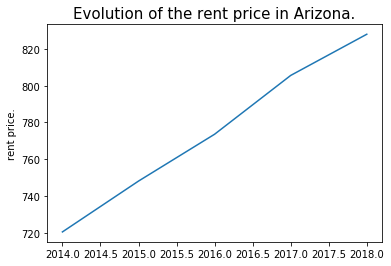

In [98]:
#we select the price of a single bedroom rent from 2014 to 2018 in Arizona
values = output.loc[output.Location == 'Arizona'][['Price_2014_1br', 'Price_2015_1br', 'Price_2016_1br', 'Price_2017_1br', 'Price_2018_1br']]
values = np.array(values)[0]
years = np.arange(2014, 2019)

#we see the evolution through the years
fig, ax = plt.subplots()

ax.plot(years, values)
ax.set_title('Evolution of the rent price in Arizona.', size=15)
ax.set_ylabel('rent price.')

So the price indeed increases in Arizona.  
What about <a href="https://www.youtube.com/watch?v=1vrEljMfXYo" target="_blank">West Virginia</a> ?

Text(0, 0.5, 'rent price.')

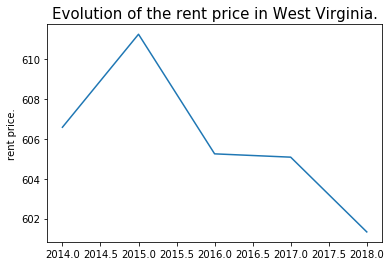

In [99]:
#we select the price of a single bedroom rent from 2014 to 2018 in West Virginia
values = output.loc[output.Location == 'West Virginia'][['Price_2014_1br', 'Price_2015_1br', 'Price_2016_1br', 'Price_2017_1br', 'Price_2018_1br']]
values = np.array(values)[0]
years = np.arange(2014, 2019)

#we see the evolution through the years
fig, ax = plt.subplots()

ax.plot(years, values)
ax.set_title('Evolution of the rent price in West Virginia.', size=15)
ax.set_ylabel('rent price.')

As expected, the rent price decrease here.

After some discussion, we decided to select only the 2018 data.

In [100]:
#saving output
output = output.rename(columns = {
    "Location": "State"
})
output = output[["State", "Price_2018_Studio", "Price_2018_1br", "Price_2018_2br", "Price_2018_3br", "Price_2018_4br"]]
output.to_pickle('Pickles/rent.pickle')

,State,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
0,Alabama,605.416667,659.000000,800.666667,1069.666667,1244.333333
1,Alaska,814.333333,930.500000,1190.333333,1682.166667,2019.500000
2,Arizona,701.000000,828.000000,1046.000000,1512.333333,1754.416667
3,Arkansas,524.666667,571.166667,721.416667,977.583333,1144.833333
4,California,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333
5,Colorado,866.083333,1019.250000,1292.416667,1862.166667,2182.583333
6,Connecticut,888.666667,1063.666667,1331.583333,1692.166667,1955.750000
7,Delaware,847.750000,977.500000,1191.666667,1573.083333,1786.500000
8,District of Columbia,1397.583333,1468.333333,1694.500000,2232.166667,2770.833333
9,Florida,827.916667,960.916667,1197.916667,1622.916667,1948.583333
